In [31]:
import geopandas as gpd
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon

In [32]:
import pandas as pd


In [33]:
file = gpd.read_file('cb_2024_us_state_5m.shp')

In [34]:
file.head()

,STATEFP,STATENS,GEOIDFQ,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,35,00897535,0400000US35,35,NM,New Mexico,00,314198519809,726531289,"POLYGON ((-109.05017 31.48, -109.04984 31.4995..."
1,72,01779808,0400000US72,72,PR,Puerto Rico,00,8869519701,4921758891,"MULTIPOLYGON (((-65.34244 18.34962, -65.33561 ..."
2,48,01779801,0400000US48,48,TX,Texas,00,676656702022,19011620342,"POLYGON ((-106.64548 31.89867, -106.64084 31.9..."
3,21,01779786,0400000US21,21,KY,Kentucky,00,102266755818,2384136185,"MULTIPOLYGON (((-89.40565 36.52816, -89.39868 ..."
4,39,01085497,0400000US39,39,OH,Ohio,00,105824130554,10274225585,"MULTIPOLYGON (((-82.7328 41.60432, -82.72107 4..."


In [35]:
print(file)

   STATEFP   STATENS      GEOIDFQ GEOID STUSPS  \
0       35  00897535  0400000US35    35     NM   
1       72  01779808  0400000US72    72     PR   
2       48  01779801  0400000US48    48     TX   
3       21  01779786  0400000US21    21     KY   
4       39  01085497  0400000US39    39     OH   
5       13  01705317  0400000US13    13     GA   
6       05  00068085  0400000US05    05     AR   
7       41  01155107  0400000US41    41     OR   
8       42  01779798  0400000US42    42     PA   
9       29  01779791  0400000US29    29     MO   
10      37  01027616  0400000US37    37     NC   
11      49  01455989  0400000US49    49     UT   
12      51  01779803  0400000US51    51     VA   
13      56  01779807  0400000US56    56     WY   
14      54  01779805  0400000US54    54     WV   
15      36  01779796  0400000US36    36     NY   
16      18  00448508  0400000US18    18     IN   
17      20  00481813  0400000US20    20     KS   
18      16  01779783  0400000US16    16     ID   


In [36]:
df = file.drop([1,49,52,53,54,55])
print(df)

   STATEFP   STATENS      GEOIDFQ GEOID STUSPS            NAME LSAD  \
0       35  00897535  0400000US35    35     NM      New Mexico   00   
2       48  01779801  0400000US48    48     TX           Texas   00   
3       21  01779786  0400000US21    21     KY        Kentucky   00   
4       39  01085497  0400000US39    39     OH            Ohio   00   
5       13  01705317  0400000US13    13     GA         Georgia   00   
6       05  00068085  0400000US05    05     AR        Arkansas   00   
7       41  01155107  0400000US41    41     OR          Oregon   00   
8       42  01779798  0400000US42    42     PA    Pennsylvania   00   
9       29  01779791  0400000US29    29     MO        Missouri   00   
10      37  01027616  0400000US37    37     NC  North Carolina   00   
11      49  01455989  0400000US49    49     UT            Utah   00   
12      51  01779803  0400000US51    51     VA        Virginia   00   
13      56  01779807  0400000US56    56     WY         Wyoming   00   
14    

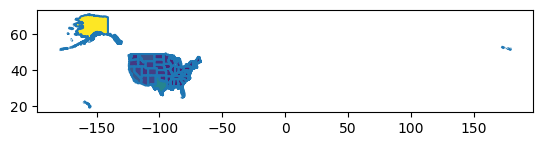

In [37]:
ax = df.boundary.plot()
df.plot(ax=ax, column='ALAND')
plt.show()

In [38]:
print(df.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 50 entries, 0 to 51
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   50 non-null     object  
 1   STATENS   50 non-null     object  
 2   GEOIDFQ   50 non-null     object  
 3   GEOID     50 non-null     object  
 4   STUSPS    50 non-null     object  
 5   NAME      50 non-null     object  
 6   LSAD      50 non-null     object  
 7   ALAND     50 non-null     int64   
 8   AWATER    50 non-null     int64   
 9   geometry  50 non-null     geometry
dtypes: geometry(1), int64(2), object(7)
memory usage: 2.7+ KB
None


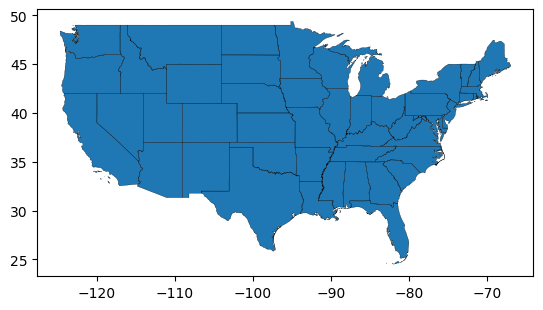

In [39]:
cont = df.drop([26,46])
cx = cont.boundary.plot(edgecolor='black', linewidth=0.2)
cont.plot(ax=cx)
plt.show()

In [40]:
from shapely.geometry import shape
from shapely import box
from shapely.ops import unary_union
from shapely import simplify

In [41]:
data_file = pd.read_csv('2024_splits_lower_48.csv')
print(data_file.head())
cont = pd.merge(
    left = cont,
    right = data_file,
    left_on = 'NAME',
    right_on = 'state',
    how='left'
)

print(cont.head())

        state    Split1    Split2    Split3    Split4
0     Alabama  0.253191  0.379721  0.323293  0.018594
1     Arizona  0.289163  0.328441  0.437303  0.018195
2    Arkansas  0.279385  0.341153  0.270690  0.024809
3  California  0.340398  0.233831  0.465502  0.047657
4    Colorado  0.256172  0.310840  0.565884  0.065733
  STATEFP   STATENS      GEOIDFQ GEOID STUSPS        NAME LSAD         ALAND  \
0      35  00897535  0400000US35    35     NM  New Mexico   00  314198519809   
1      48  01779801  0400000US48    48     TX       Texas   00  676656702022   
2      21  01779786  0400000US21    21     KY    Kentucky   00  102266755818   
3      39  01085497  0400000US39    39     OH        Ohio   00  105824130554   
4      13  01705317  0400000US13    13     GA     Georgia   00  149485762701   

        AWATER                                           geometry       state  \
0    726531289  POLYGON ((-109.05017 31.48, -109.04984 31.4995...  New Mexico   
1  19011620342  POLYGON ((-106.64

In [42]:
def verticle_split(shape, split):
    area = shape.area
    target_area = area * split
    error = 1
    converge = 10
    xmin = -130
    ymin = 20
    xmax = -60
    ymax = 20
    test_shape = box(xmin, ymin, xmax, ymax)
    while error > 0.00001:
        ymax += converge
        test_box = box(xmin, ymin, xmax, ymax)
        test_shape = test_box.intersection(shape)
        test_area = test_shape.area
        if test_area > target_area:
            ymax -= converge
            converge *= .1
        else:
            error = (target_area - test_area) / area

    print(error)
    return test_shape
            

In [43]:
def right_horizontal_split(shape, split):
    area = shape.area
    target_area = area * split
    error = 1
    converge = 10
    xmin = -60
    ymin = 20
    xmax = -60
    ymax = 50
    test_shape = box(xmin, ymin, xmax, ymax)
    while error > 0.00001:
        xmin -= converge
        test_box = box(xmin, ymin, xmax, ymax)
        test_shape = test_box.intersection(shape)
        test_area = test_shape.area
        if test_area > target_area:
            xmin += converge
            converge *= .1
        else:
            error = (target_area - test_area) / area

    print(error)
    return test_shape
 

In [44]:
def horizontal_split(shape, split):
    area = shape.area
    target_area = area * split
    error = 1
    converge = 10
    xmin = -130
    ymin = 20
    xmax = -130
    ymax = 50
    test_shape = box(xmin, ymin, xmax, ymax)
    while error > 0.00001:
        xmax += converge
        test_box = box(xmin, ymin, xmax, ymax)
        test_shape = test_box.intersection(shape)
        test_area = test_shape.area
        if test_area > target_area:
            xmax -= converge
            converge *= .1
        else:
            error = (target_area - test_area) / area

    print(error)
    return test_shape
 

In [45]:
cont_split_dict = {'type':['nonvoter','republican','democratic','other','novote'], 'geometry':[None,None,None,None,None]}
cont_split_a = pd.DataFrame(cont_split_dict)
cont_split = gpd.GeoDataFrame(cont_split_a)


for i, rows in cont.iterrows():
    cont.loc[i, 'nonvoter'] = verticle_split(shape(cont.loc[i, 'geometry']), cont.loc[i, 'Split1'])
    cont.loc[i, 'remnant'] = cont.loc[i, 'geometry'] - cont.loc[i, 'nonvoter']
    if cont_split.loc[0, 'geometry']:
        cont_split.loc[0, 'geometry']  = unary_union((cont_split.loc[0, 'geometry'], cont.loc[i, 'nonvoter']))
    else:
        cont_split.loc[0, 'geometry'] = cont.loc[i, 'nonvoter']
    

9.814526903603388e-06
7.076388568137479e-06
9.913503013947442e-06
8.480326215241289e-06
7.726227763563852e-06
9.362300536020415e-06
9.147674378365473e-06
5.564697385519603e-06
4.263291999827208e-07
9.244746889053172e-06
9.22971631183181e-06
5.920154429815842e-06
7.741920617132363e-06
7.438717256322558e-06
9.376022096788981e-06
8.542818602449163e-06
9.781879135233633e-06
7.938092035993368e-06
9.760634186172959e-06
9.888006433810174e-06
8.249726044088986e-06
9.322369435426361e-06
7.005647233081454e-06
6.456589802010892e-06
7.96752979370819e-06
9.70192899663983e-06
9.458561023499568e-06
3.946321176300546e-06
9.30814906916719e-06
9.613507682755589e-06
7.300754968682578e-06
9.580382584301296e-06
8.042359665099529e-06
6.0404833520603034e-06
9.403330096142015e-06
8.114853629117922e-06
7.848623749209564e-06
8.077939378526406e-06
3.506695906098809e-06
9.349530154389356e-06
8.111537356354474e-06
3.7662472770471775e-06
6.044083348955786e-06
9.515262073697336e-06
7.444214048811823e-06
8.2666800733

In [46]:
print(cont.head())

  STATEFP   STATENS      GEOIDFQ GEOID STUSPS        NAME LSAD         ALAND  \
0      35  00897535  0400000US35    35     NM  New Mexico   00  314198519809   
1      48  01779801  0400000US48    48     TX       Texas   00  676656702022   
2      21  01779786  0400000US21    21     KY    Kentucky   00  102266755818   
3      39  01085497  0400000US39    39     OH        Ohio   00  105824130554   
4      13  01705317  0400000US13    13     GA     Georgia   00  149485762701   

        AWATER                                           geometry       state  \
0    726531289  POLYGON ((-109.05017 31.48, -109.04984 31.4995...  New Mexico   
1  19011620342  POLYGON ((-106.64548 31.89867, -106.64084 31.9...       Texas   
2   2384136185  MULTIPOLYGON (((-89.40565 36.52816, -89.39868 ...    Kentucky   
3  10274225585  MULTIPOLYGON (((-82.7328 41.60432, -82.72107 4...        Ohio   
4   4419221858  POLYGON ((-85.60516 34.98468, -85.5142 34.9835...     Georgia   

     Split1    Split2    Split3 

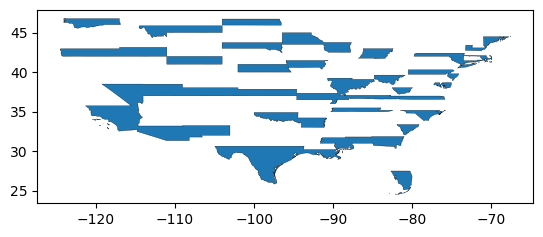

In [47]:
csx = cont_split.boundary.plot(edgecolor='black', linewidth=0.2)
cont_split.plot(ax=csx)
plt.show()

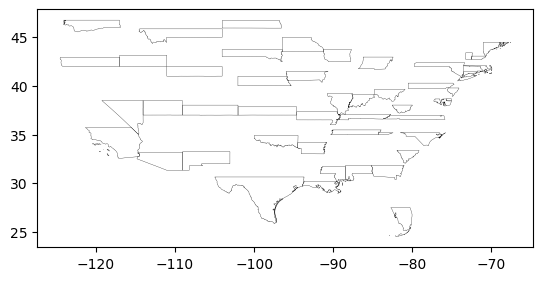

In [48]:
bot = cont.copy()
for i, rows in bot.iterrows():
    bot.loc[i, 'geometry'] = bot.loc[i, 'nonvoter']

bx = bot.boundary.plot(edgecolor='black', linewidth=0.2)
bot.plot(ax=cx)
plt.show()

In [49]:
for i, rows in cont.iterrows():
    cont.loc[i, 'republican'] = horizontal_split(shape(cont.loc[i, 'remnant']), cont.loc[i, 'Split2'])
    cont.loc[i, 'remnant2'] = cont.loc[i, 'remnant'] - cont.loc[i, 'republican']
    if cont_split.loc[1, 'geometry']:
        cont_split.loc[1, 'geometry']  = unary_union((cont_split.loc[1, 'geometry'], cont.loc[i, 'republican']))
    else:
        cont_split.loc[1, 'geometry'] = cont.loc[i, 'republican']


9.303941799215116e-06
4.1159160715136546e-06
9.885808358106458e-06
8.081293824948373e-06
7.5334513568865615e-06
9.259024740672363e-06
9.920538161925586e-06
5.121880404986573e-06
9.998777835945205e-06
9.32872795325559e-06
7.2868736271494545e-06
7.30227154112632e-07
9.028811386380866e-06
7.93131644004119e-06
4.849260716731511e-07
7.773260888936625e-06
9.348712770230697e-06
9.402785494640517e-06
9.708061816293564e-06
1.5308919600200786e-06
8.694407135727631e-06
7.583881390021156e-06
5.605843636090608e-06
8.029682716491033e-06
9.370273324298356e-06
6.2733342335047195e-06
1.3332732623252532e-07
7.1767596020205925e-06
6.9449147305370715e-06
4.2101907277390785e-06
9.147172087707949e-06
2.9569697465352668e-06
3.607074663675182e-06
8.957148276784186e-06
7.305821892891231e-06
9.616588745519185e-06
7.418583299820351e-06
8.755138106828538e-06
1.26536411719366e-06
5.4102023832803604e-06
7.19763108683376e-06
8.347137947675535e-06
4.741389021953997e-06
4.141885577631305e-06
9.993667106450517e-07
9.00

In [50]:
print(cont_split.head())

         type                                           geometry
0    nonvoter  MULTIPOLYGON (((-94.91541 29.65661, -94.92132 ...
1  republican  MULTIPOLYGON (((-114.52578 33.65712, -114.5252...
2  democratic                                               None
3       other                                               None
4      novote                                               None


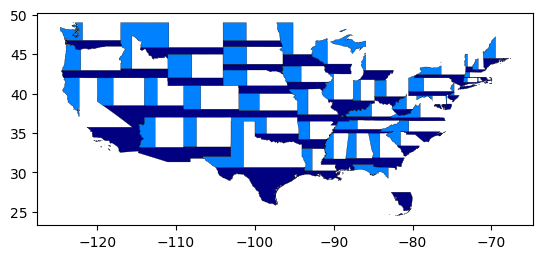

In [51]:
csx = cont_split.boundary.plot(edgecolor='black', linewidth=0.2)
cont_split.plot(ax=csx, cmap = 'jet', legend = True)
plt.show()

In [52]:
tol = 0.0001
for i, rows in cont.iterrows():
    cont.loc[i, 'democrat'] = right_horizontal_split(shape(cont.loc[i, 'remnant2']), cont.loc[i, 'Split3'])
    cont.loc[i, 'remnant3'] = cont.loc[i, 'remnant2'].difference(cont.loc[i, 'democrat'])
    if cont_split.loc[2, 'geometry']:
        cont_split.loc[2, 'geometry']  = unary_union((cont_split.loc[2, 'geometry'], cont.loc[i, 'democrat'].buffer(tol)))
    else:
        cont_split.loc[2, 'geometry'] = cont.loc[i, 'democrat'].buffer(tol)

cont_split.loc[2, 'geometry'].buffer(-tol)

7.965844656075359e-06
2.5556628333196716e-06
3.6268149887340314e-06
6.752540968235393e-06
7.300290665926099e-06
8.208028560693673e-06
1.3224596143535097e-06
9.54054885184346e-06
6.292240572054903e-06
5.319199093028008e-07
7.783467929785095e-06
7.694739262994192e-06
4.917388870320584e-06
8.060126843945743e-06
9.888374881582387e-06
7.376293360796491e-06
8.935120417457293e-06
9.024298534707897e-06
9.322291708919921e-06
8.25064302929633e-06
4.160502799250922e-06
6.278436995501153e-06
8.14837545597972e-06
8.979590770266003e-06
6.792312596483477e-06
9.225453955421309e-06
9.614840842957749e-06
8.848079244653395e-06
9.508530161229014e-06
8.903272732363463e-06
2.8960716911139547e-06
8.721802516308823e-06
8.886488797697275e-06
9.399741755205065e-06
8.607253377158045e-06
1.6563259759743024e-06
8.913195949244038e-06
3.500912957398365e-07
9.691387831773365e-06
6.800753577177543e-06
5.28882961854601e-06
6.587442798225412e-06
5.243978533213284e-06
7.015868476522584e-06
8.302960320552567e-06
1.5985841

In [53]:
print(cont.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATEFP     48 non-null     object  
 1   STATENS     48 non-null     object  
 2   GEOIDFQ     48 non-null     object  
 3   GEOID       48 non-null     object  
 4   STUSPS      48 non-null     object  
 5   NAME        48 non-null     object  
 6   LSAD        48 non-null     object  
 7   ALAND       48 non-null     int64   
 8   AWATER      48 non-null     int64   
 9   geometry    48 non-null     geometry
 10  state       48 non-null     object  
 11  Split1      48 non-null     float64 
 12  Split2      48 non-null     float64 
 13  Split3      48 non-null     float64 
 14  Split4      48 non-null     float64 
 15  nonvoter    48 non-null     object  
 16  remnant     48 non-null     object  
 17  republican  48 non-null     object  
 18  remnant2    48 non-null     object  
 19  de

In [54]:
for i, rows in cont.iterrows():
    cont.loc[i, 'other'] = verticle_split(shape(cont.loc[i, 'remnant3']), cont.loc[i, 'Split4'])
    cont.loc[i, 'novote'] = cont.loc[i, 'remnant3'] - cont.loc[i, 'other']
    if cont_split.loc[3, 'geometry']:
        cont_split.loc[3, 'geometry']  = unary_union((cont_split.loc[3, 'geometry'], cont.loc[i, 'other']))
    else:
        cont_split.loc[3, 'geometry'] = cont.loc[i, 'other']
    if cont_split.loc[4, 'geometry']:
        cont_split.loc[4, 'geometry']  = unary_union((cont_split.loc[4, 'geometry'], cont.loc[i, 'novote']))
    else:
        cont_split.loc[4, 'geometry'] = cont.loc[i, 'novote']


7.896096948684766e-06
9.066048607951778e-06
9.830335825817732e-06
4.845246365400114e-06
9.168451147086958e-06
8.875571669712721e-06
8.619295437548112e-06
8.585362981498444e-06
7.04219664393761e-06
6.33465782473553e-06
8.532559442633777e-06
5.339130628981681e-06
7.75723936334781e-06
1.4664227493734633e-06
7.210346942027938e-06
9.268521228061192e-06
7.82299140678937e-06
8.308815339171355e-06
9.994787965467351e-06
8.014622846288163e-06
4.408103531920095e-06
7.987086466156365e-06
8.10570696332571e-06
5.713191507312469e-06
9.64573396736751e-06
9.953874842644577e-06
9.333448970048634e-06
7.400971365926165e-06
1.2770947409861196e-06
9.208778660299466e-06
2.2875406215651183e-06
9.585216446231432e-06
8.554406095090923e-06
8.90990678933524e-06
5.047331101895414e-06
8.361102105591155e-06
9.529548380258383e-06
8.626161708710213e-06
7.842824702898525e-06
5.052360220471676e-06
6.420887813990678e-06
8.302720721518201e-06
8.737056667424337e-06
8.146883889713448e-06
5.819067035770241e-06
6.209384438327

In [55]:
from matplotlib.colors import ListedColormap

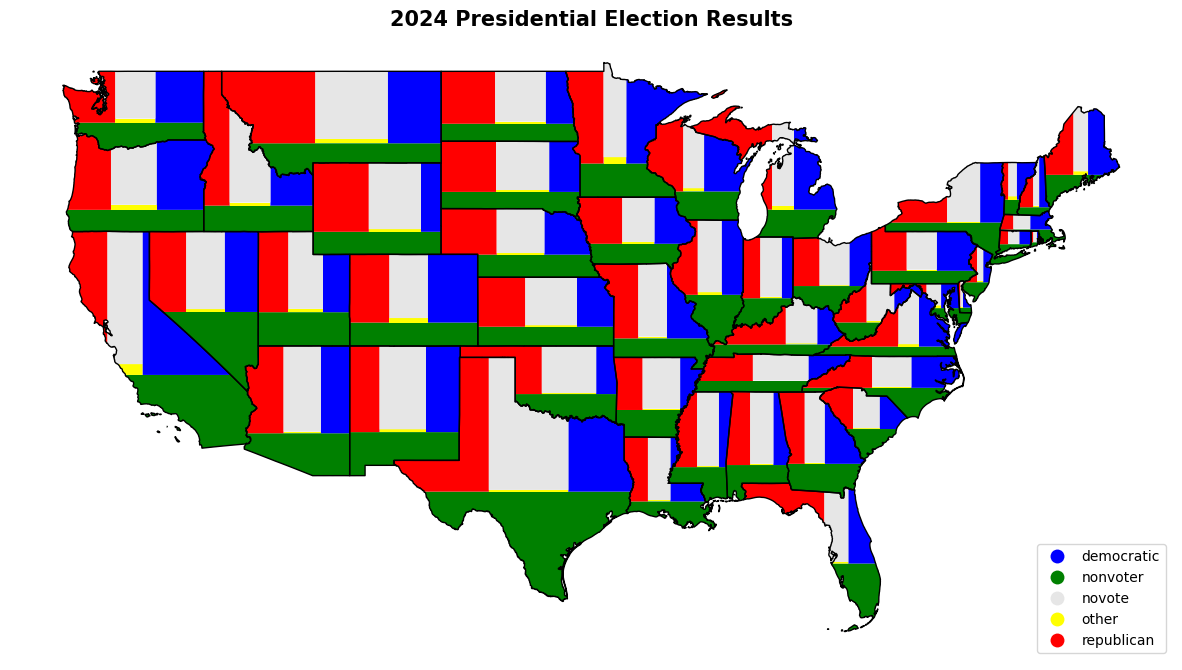

In [60]:
color_map = ListedColormap(('blue', 'green', '0.9', 'yellow', 'red'))

csx = cont_split.boundary.plot(cmap = color_map, edgecolor='black', linewidth=0.0, figsize = (15,15))
cont_split.plot(ax=csx, legend = True, column = 'type', cmap = color_map)
cont.plot(ax=csx, facecolor='none', edgecolor='black', linewidth=1)
csx.get_xaxis().set_visible(False)
csx.get_yaxis().set_visible(False)
csx.spines[:].set_visible(False)
csx.set_title('2024 Presidential Election Results', size=15, weight='bold')
csx.get_legend().set_loc(4)
plt.show()

In [57]:
print(cont_split.head())

         type                                           geometry
0    nonvoter  MULTIPOLYGON (((-94.91541 29.65661, -94.92132 ...
1  republican  MULTIPOLYGON (((-114.52578 33.65712, -114.5252...
2  democratic  MULTIPOLYGON (((-91.51483 31.27934, -91.51484 ...
3       other  MULTIPOLYGON (((-101.4411 30.71174, -97.0932 3...
4      novote  MULTIPOLYGON (((-91.52254 31.52208, -91.52292 ...
